# Model Training and Evaluation


***
Author: Rime Saad  
Date: October 2025  
Status: Part 2 of 2 - Model Training Complete   
Best Model: LinearSVC (99.12% accuracy)  
Saved model: spam_trained_model.joblib  
run in virtual env 'spam_detector_env'
***

## Project Objective
Train and evaluate multiple machine learning models to classify emails as spam (1) or legitimate/ham (0), then select the best-performing model for production deployment. This notebook builds upon the data cleaning and exploratory analysis from Notebook 01 and focuses on model testing, hyperparameter tuning, and performance evaluation..

## Dataset
**Training Data:**
- Size: 23,110 cleaned emails (after removing duplicates and missing values)
- Features: 9 columns (Subject, Message, Date, Label, engineered features)
- Split: 80/20 train-test split with stratification
- Class Distribution: Balanced (~50% spam, ~50% ham)

**Test Data:**
- Size: 6,743 held-out emails (20% of original dataset)
- Purpose: Final performance evaluation
- Never used during model development or hyperparameter tuning
  
## Features Engineering:

### Text Features:
- **Combined Text:** Subject + Message concatenated
- **Text Preprocessing:** Lowercase conversion and whitespace stripping
- **Stopwords/Punctuation:** Retained because they are important spam indicators like "!!!", "FREE"
- **Vectorization:** TF-IDF (Term Frequency-Inverse Document Frequency)

### Engineered Features:
- **day_of_week:** Day email was sent (0=Monday, 6=Sunday)
- **repeat_freq:** Number of times email subject+message appears in dataset

### Final Feature Space:
- 67,000 TF-IDF features  
- 2 scaled features: day_of_week, repeat_freq
- Total: 67,002 features per email
  
## Models Evaluated
Four classification algorithms were compared using 5-fold stratified cross-validation:

1. **Multinomial Naive Bayes** - Fast probabilistic baseline
2. **SVC (Linear Kernel)** - Support Vector Classifier
3. **Logistic Regression** - Linear probabilistic classifier  
4. **LinearSVC** - Optimized linear SVM (best performer)

Selection Criteria: Models chosen for proven effectiveness on high-dimensional sparse text data.


## Methodology
### 1. Text Vectorization

    - TF-IDF (Term Frequency-Inverse Document Frequency) transformation
    - Simple processing of text where it is stripped and converted to lower case
    - Preserved stopwords and punctuation which are important spam indicators
    - Converted email text into 143,211 numerical features

### 2. Hyperparameter Optimization

**Strategy:** Use fast MultinomialNB to find optimal TF-IDF features, then apply to other models

**GridSearch Process:**
- First pass: [10k, 20k, 30k, 50k, 60k, 70k, 80k] features → Best: 60k
- Second pass: [60k, 65k, 70k, 75k] features → Best: 70k
- Third pass: [66k, 67k, 68k, 69k, 70k, 71k, 72k] features → Best: 67k

**Result:** 67,000 features maximizes F1 score (0.9883)

**Why tune with MultinomialNB?**
- 4-5× faster than LinearSVC
- Feature sensitivity helps identify optimal count
- Results transfer well to other models

### 3. Model Evaluation
**Model evluation metrics used :**
- F1 Score: Primary metric that is the harmonic mean of precision and recall
- Precision (spam): Minimize false positives (ham marked as spam)
- Recall (spam): Catch all spam emails
- Recall (ham): Minimize false negatives -> don't block legitimate emails
- AUC-ROC: Overall classification ability
- Accuracy: Overall correctness
  
### Pipeline Architecture
All models use scikit-learn pipelines for consistency and deployment-readiness:
```
Pipeline:  
├─ ColumnTransformer (preprocessing)  
│    ├─ TfidfVectorizer(max_features=67000) → 'combined_with_stopwords'  
│    └─ StandardScaler → ['day_of_week', 'repeat_freq']  
└─ Model (LinearSVC / LogisticRegression / SVC)  
```
**Saved Pipeline:** `spam_trained_model.joblib`
- Complete preprocessing + trained LinearSVC model
- Ready for production deployment
- Consistent preprocessing guaranteed
  
## Results:
`LinearSVC was the best performer`  
**Test set performance:**  
- `Accuracy: 99.42%`
- F1: 0.9942
- Precision: 0.9912
- Recall: 0.9972
- Accuracy: 0.9942
---
This meanes the model had:  
- Correctly classified: 6,705 out of 6,743 emails
- False Positives (Ham→Spam): 29 (0.43%)
- False Negatives (Spam→Ham): 9 (0.13%)
---
## Why LinearSVC Performed Best:
- Optimized for high-dimensional sparse data (67,000 TF-IDF features)
- Better at catching ham emails meaning highest recall_ham score
- Best balance across all metrics wih no weak spots
- Computationally efficient because it is faster than kernel SVC
- Generalizes well because it had consistent train/test performance
- Highest overall accuracy at 99.12% and highers F1 score at 99.1%

## Key Findings
- 67,000 vs 10,000 features: +0.6% F1 score improvement
- day_of_week feature: Marginal improvement in scores
- Repeat frequency: Helps identify recurring spam campaigns
- Keeping stopwords/punctuation: important for spam detection. Some examples: ("!!!", "FREE", "CLICK HERE")

## Model Insights
**Spam Indicators Learned by Model:**
- Words: "money", "investment", "account"
- Patterns: Excessive punctuation (!!!), ALL CAPS, multiple links
- Repetition: Same message sent multiple times

**Ham Indicators:**
- Words: "meeting", "attached", "please", "regards", "schedule"
- Patterns: Professional tone, proper grammar, context-specific terms
- Sender patterns: Work-related communication style
  
## Potential model limitaions
- False Positives (ham -> spam):
    - Marketing emails from legitimate companies
    - Newsletters with promotional language
- False Negatives (spam -> ham):
    - Sophisticated phishing attempts mimicking business emails
    - Spam with minimal promotional language

## To get predict probability of a prediction
I need to be able to calculate the predict probability of the predictions, but LinearSVC does not have predict proba, so a workaround is to calculate the decision score.Decision scores represent the distance to the decision boundary:
- Positive scores → Classified as SPAM -> the more positive the further it is from decision boundary on the positive side and is more confident
- Negative scores → Classified as HAM -> the more negative the further it is from decision boundary on the negative side and is more confident
- Score near 0 → On the decision boundary -> uncertain

## Next steps:
- REST API deployment (Flask/FastAPI)
- Web interface for real time classification
- Production monitoring dashboard

## Key Takeaways
- All models performed excellently at more than 98% accuracy on this balanced dataset 
- Using 67,000 features vs 10,000 improved performance
- Adding temporal features (day_of_week, repeat_freq) helped slightly
- Text preprocessing matters: Keeping stopwords/punctuation improved spam detection
- More features = better performance: 60k features outperformed 10k
- Linear models work well: High-dimensional sparse data is often linearly separable
- Cross-validation is essential: Prevented overfitting and validated generalization
- Simple wins: LinearSVC beat complex models with better speed and accuracy



## Table of Contents

- Import Libraries & Setup
- Data Loading
- Text Vectorization
- Feature Engineering
- Model Training: Multinomial Naive Bayes
- Hyperparameter Tuning
- Model Training: SVC
- Model Training: Logistic Regression
- Model Training: LinearSVC
- Model Comparison
- Test Set Evaluation
- Real-Time Prediction Demo
- Model Deployment

In [ ]:
# Python will automatically reload changed files
%load_ext autoreload
%autoreload 2



## Imports
- import relavant libraries

In [2]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#models
#import models
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.compose import ColumnTransformer

#for metrics 
from sklearn.metrics import make_scorer,accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Set the path

In [3]:
from pathlib import Path

notebook_path = Path.cwd()
parent_dir = Path.cwd().parent
data_path = parent_dir/"data"

- Import data

In [ ]:
clean_emails = pd.read_csv(data_path/"cleaned_data.csv")
assert clean_emails.shape[0] > 0, 'data did not looad'
assert 'Subject' in clean_emails.columns, 'data missing subject column'
assert 'Message' in clean_emails.columns, 'data missing message columns'

print(f'Size of training data: {clean_emails.shape}')
print('Printing the first 5 columns')
clean_emails.head()

- copy data so I can have a copy of the original data before changes

In [ ]:
emails_org = clean_emails.copy()


## Explotary data analysis

In [ ]:
emails_org.head()

In [ ]:
#make sure there are no missing information
emails_org.isna().sum()

In [ ]:

print('Shape of data', emails_org.shape)


In [ ]:
emails_org.groupby('Label')['repeat_freq'].value_counts()


- For spam detection I should not remove stopwords or punctuation, because they add a lot of value for the model. Spam emails typically contain many symbols and repetitive words. So I will use the combined text column in the emails df and just strip spaces and make it in lower case and this data is fed directly ot tfidf which does a better job at tokenizing anyway.

In [ ]:
emails['combined_with_stopwords'] = emails['combined_text'].str.lower().str.strip()

- create the feature matrix and the target

In [ ]:
#target
y = emails['Label'].map({'ham':0,'spam':1})
#data
emails = emails.drop(columns=['Label'], axis=1)
print('Unique values for ',y.unique())

### Vectorization of emails

In [ ]:
tfidf = TfidfVectorizer()
X_vec = tfidf.fit_transform(emails['combined_with_stopwords'])

X_vec.shape

-  Engineered features, day_of_week and repeat_freq need to be scaled before adding them to vectorized data, and since MultinomialNB requires non negative values MinMaxScaler will be used here, but for logistic regression and svc I will use standardscaler

In [ ]:
from scipy.sparse import hstack
scaler = MinMaxScaler() 
scaled_feat = scaler.fit_transform(emails[['day_of_week', 'repeat_freq']])
X = hstack([X_vec,scaled_feat])

X.shape

- create a scorer for the cross validate
- try naiveBayes' MultinomialNB
  

In [ ]:
mnb = MultinomialNB()
scorer = {'F1': make_scorer(f1_score, pos_label=1),
           'Precision':make_scorer(precision_score),
           'Recall':make_scorer(recall_score),
           'Recall_ham':make_scorer(recall_score,pos_label=0),
           'Accuracy':'accuracy',#accuracy is built in
           'AUC':make_scorer(roc_auc_score)
          }

results = cross_validate(mnb, X, y, scoring = scorer,cv=5,return_train_score=True )

In [ ]:
results

In [ ]:
results_mean = {k:round(np.mean(v),4) for k, v in results.items()}
results_mean

In [ ]:
scores_df = pd.DataFrame([results_mean], index=['MultinomialNB'])
scores_df

- Having that many features adds complexity to the model and runs the risk of overfitting. Here, all the training scores are higher than the test scores which can run the risk of overfitting.
- For SVC is very slow when the number of features is so high so it is better to tune the hyperparameter max_features using multinomialNB, which is faster, the do a small grid search to the max features using SVC


### Create a function to fit model and return results


In [ ]:
from scipy.sparse import hstack
def model_training(X,y, model):
    '''
    Calculates cross validation scores 

    Parameters:
    --------------------------
    The vectorized data, X and the target data y and the model to be used in cross validation

    returns:
    __________________________
    scores after fitting the model using cross_validation
    '''
    scorer = {'F1': make_scorer(f1_score, pos_label=1),
               'Precision':make_scorer(precision_score),
               'Recall':make_scorer(recall_score),
               'Recall_ham':make_scorer(recall_score,pos_label=0),
               'Accuracy':'accuracy',#accuracy is built in
               'AUC':make_scorer(roc_auc_score)
              }
    #scale engineered features
    scaler = MinMaxScaler() 
    scaled_feat = scaler.fit_transform(emails[['day_of_week', 'repeat_freq']])    
    X_comb = hstack([X,scaled_feat]) #adds the features created to the data
    
    results = cross_validate(model, X_comb, y, scoring = scorer,cv=5,return_train_score=True )

    return results
    
def add_to_scores_df(score_df, scores, model_name):
    '''
    Adds scores to a scores dataframe 
    
    Parameters:
    ---------------------
    the scores df, the actual scores from cross validation 
    returns: 
    ---------------------
    dataframe with scores added
    '''
    scores_mean = {k:round(np.mean(v),4) for k,v in scores.items()}
    score_df.loc[model_name]= scores_mean
    return score_df

- Try max_features = 10000 to see if results are affected as a test

In [ ]:
#Use the function to test this data with mnb
mnb = MultinomialNB()
results_mnb_10000 = model_training(X_10000,y, mnb)
#add results to socres_df
scores_df = add_to_scores_df(scores_df,results_mnb_10000, 'mnb_10000')
scores_df


- Ability to catch spam (precision) is lowered
- Ability to identify ham emails is lowered (recall_ham)
- This means that some important information for classification was lost when 10,000 features are used


## Pipeline

I initially created the `model_training` function to handle preprocessing and cross-validation. However, I realized that scikit-learn pipelines are more efficient and production ready.

## Improved Approach with Scikit-Learn Pipelines

Instead of manually preprocessing and fitting, I'll use `Pipeline` and `ColumnTransformer` to:
1. Automatically apply preprocessing to train/test data
2. Ensure no data leakage during cross-validation
3. Create a single deployable pipeline which is the industry-standard approach for production ML systems

**Why I swithed to pipeline**
- **Prevents data leakage**: Preprocessing happens inside cross-validation
- **Easier to maintain**: Single object for preprocessing + model
- **Deployment ready**: I can save and load entire pipeline with `joblib` which is also easier for Flask app later
- **Cleaner code**: No manual feature scaling/concatenation needed
- **Consistent**: Same preprocessing guaranteed for train/test/production

The model_training function is kept above for reference, but all subsequent models use pipelines.




In [ ]:
#preprocessing step in the pipeline
preprocessor = ColumnTransformer([
    #name, vectorizer, columns to transform
    ('tfidf',TfidfVectorizer(), 'combined_with_stopwords'),
    #scale engineered features
    ('scaled_features', MinMaxScaler(),['day_of_week', 'repeat_freq'])
])
#multinomialNB
mnb = MultinomialNB()
#pipeline
pipeline = Pipeline([
                ('preprocessor',preprocessor),
                ('model',mnb)
                
    
])


## GridSearch
The purpose of a gridsearch is to find the optimal number of TF-IDF features that maximizes model performance without overfitting.
- I need to find the best max_features in TfidfVectorizer that has enough features for prediction without loss of information and without overfitting

**Pipeline Structure:**  
```
    |─ ColumnTransformer (preprocessing)           --> allows different preprocessing for different column types:  
    │   ├─ TfidfVectorizer → emails['combined_with_stopwords']  
    │   └─ MinMaxScaler → emails[['day_of_week', 'repeat_freq']]  
    └─ Model (MultinomialNB / SVC / LinearSVC ...)  
```
### GridSearch strategy:
- The parameter that needs to be tuned: max_features in TfidfVectorizer
- Search Space: [10,000, 30,000, 50,000, 60,000, 70,000] as a starting point then iterate with closer values to the max value returned 
- Run GridSearch with more precise numbers
  
### Evaluation:
- 5 fold cross-validation on training data
- Optimize for F1 score which balances precision and recall
- Compare all metrics (Precision, Recall for spam, Recall for ham, AUC, Accuracy)

**Approach:**
- Use MultinomialNB + GridSearchCV to find optimal max_features
- Apply the optimal setting to the other models
- This saves ~1-2 hours of computation time 

**Search Space:** Start with (10,000, 30,000, 50,000, 60,000) TF-IDF features

### Hyperparameter tuning of optimal max_features, why use MultinomialNB 

1. Speed:
    - MultinomialNB trains 4 to 5 times faster than LinearSVC and more than 10 times faster than SVC
    - Allows rapid exploration of feature space

2. Feature Sensitivity: NB performance is highly responsive to feature count
   - Easily identifies when we have too few features because there is information loss
   - Performance plateaus when optimal count is reached 

4. Transferable Results:
   - Optimal features for NB generalize to other models
   - All models use the same TF-IDF feature space


### Iterate over max_features

In [ ]:
#scoring
scorer = {'F1': make_scorer(f1_score, pos_label=1),
               'Precision':make_scorer(precision_score),
               'Recall':make_scorer(recall_score),
               'Recall_ham':make_scorer(recall_score,pos_label=0),
               'Accuracy':'accuracy',#accuracy is built in
               'AUC':make_scorer(roc_auc_score)
              }
param_grid={'preprocessor__tfidf__max_features': [10000, 20000, 30000, 50000, 60000, 70000, 80000 ]}
#First iteration
gridsearch = GridSearchCV(
            pipeline,
            param_grid,
            scoring = scorer,
            refit = 'F1',
            error_score='raise',
            cv=5,
            return_train_score=True
)
#fit gridsearch
gridsearch.fit(emails,y)

In [ ]:
print('Best max feature= ', gridsearch.best_params_['preprocessor__tfidf__max_features'])
print('Best F1 score =', gridsearch.best_score_)

- 60,000 features gave the best results
- run svc with 60,000 features

In [ ]:
#Second iteration
param_grid={'preprocessor__tfidf__max_features': [60000, 65000, 70000, 75000]}

gridsearch = GridSearchCV(
            pipeline,
            param_grid,
            scoring = scorer,
            refit = 'F1',
            error_score='raise',
            cv=5,
            return_train_score=True
)
#fit gridsearch
gridsearch.fit(emails,y)

In [ ]:
print('Best max feature= ', gridsearch.best_params_['preprocessor__tfidf__max_features'])
print('Best F1 score =', gridsearch.best_score_)

In [ ]:
#Third iteration
param_grid={'preprocessor__tfidf__max_features': [66000, 67000, 68000, 69000, 70000, 71000, 72000]}

gridsearch = GridSearchCV(
            pipeline,
            param_grid,
            scoring = scorer,
            refit = 'F1',
            error_score='raise',
            cv=5,
            return_train_score=True
)
#fit gridsearch
gridsearch.fit(emails,y)
print('Best max feature= ', gridsearch.best_params_['preprocessor__tfidf__max_features'])
print('Best F1 score =', gridsearch.best_score_)

**The best parameter found is 67,000 features**

- Set max_feature parameter to 67,000 for the pipeline
- Then add scores to score_df

In [ ]:

best_n_feat = gridsearch.best_params_['preprocessor__tfidf__max_features']

pipeline.set_params(preprocessor__tfidf__max_features=best_n_feat)

scores = cross_validate(pipeline, emails, y, scoring = scorer,cv=5,return_train_score=True )

#add value to scores_df
scores_mnb_67000 = add_to_scores_df(scores_df,scores,'mnb_67000')

In [ ]:
scores_mnb_67000

## Now run SVC, LogisticRegression and LinearSVC with the max_features found in the gridsearch
- The first thing to do is redo the pipeline with standardscaler instead of MinmaxScaler for the following resons:
- MultinomialNB requires non-negative values because negative values break the probability calculations of the model, whereas the rest of the models do not
- MinMaxScaler guarantees the range of [0,1]
- StandardScaler is better at handling outliers
- The rest of the models use regularization as penalty and regularization assumes features are centered around 0
- Being centered around 0 preserves the distribution shape of the data better
## SVC with linear kernel
**Why linear kernel**
- Because tf_idf data is high dimensional and sparse data
-  High-dimensional sparse data is easier to separate linearly due to the blessing of dimensionality.It's counterintuitive, but when you have 67,000 dimensions, distances between points grow with the square root of dimensions, so points that seem close in each dimension are actually hundreds of units apart overall.
-  Sparse TF-IDF data means spam and ham emails use different vocabularies, so they're non-zero in different dimensions, making their vectors nearly orthogonal.
-  Cover's theorem formalizes that "the probability of linear separability approaches 100% as dimensions increase". This is why simple linear SVMs consistently outperform complex kernels for text classification, the data structure naturally supports linear separation.

In [ ]:
svc = SVC(kernel='linear') 

preprocessor = ColumnTransformer([
    #name, transformation, columns to transform
    ('tfidf',TfidfVectorizer(), 'combined_with_stopwords'),
    #scale engineered features
    ('scaled_features', StandardScaler(),['day_of_week', 'repeat_freq'])
])

pipeline = Pipeline([
                ('preprocessor',preprocessor),
                ('model',svc)
        ])
scores_svc = cross_validate(pipeline,emails,y,cv=5,scoring=scorer, return_train_score=True)

In [ ]:
#display svc results
scores_svc_df = add_to_scores_df(scores_df,scores_svc,'svc_67000')
scores_svc_df

- SVC has slightly higher f1 scores: mnb=0.9866, svc = 0.9907
- SVC has higher recall with mnb = 0.9871, svc = 0.9952 meaning it is better at catching spam emails
- SVC is can achieve higher scores and is better at finding complex decision boundaries, but it takes longer to predict especially with large data sets, it is also memory intensive.


## LinearRegression
- Next I will try linearRegression

In [ ]:

pipeline = Pipeline([
                ('preprocessor',preprocessor),
                ('model',LogisticRegression(max_iter=1000))
        ])
scores_lc = cross_validate(pipeline,emails,y,cv=5,scoring=scorer, return_train_score=True)

In [ ]:
scores_lr = add_to_scores_df(scores_svc_df,scores_lc,'LR_67000')
scores_lr

## LinearSVC
- LinearSVC is optimized for high-dimensional, sparse data like the tf_idf data
- in this data the number of features(67,000) is greater than the sample size (24,783)
- optimized for linear SVMs and typically scales better to large datasets with a high number of samples.

In [ ]:

pipeline = Pipeline([
                ('preprocessor',preprocessor),
                ('model',LinearSVC())
        ])
scores_Lsvc = cross_validate(pipeline,emails,y,cv=5,scoring=scorer, return_train_score=True)

In [ ]:
scores_svc_lr = add_to_scores_df(scores_lr, scores_Lsvc, 'Lscv')
scores_svc_lr

### Create visualization

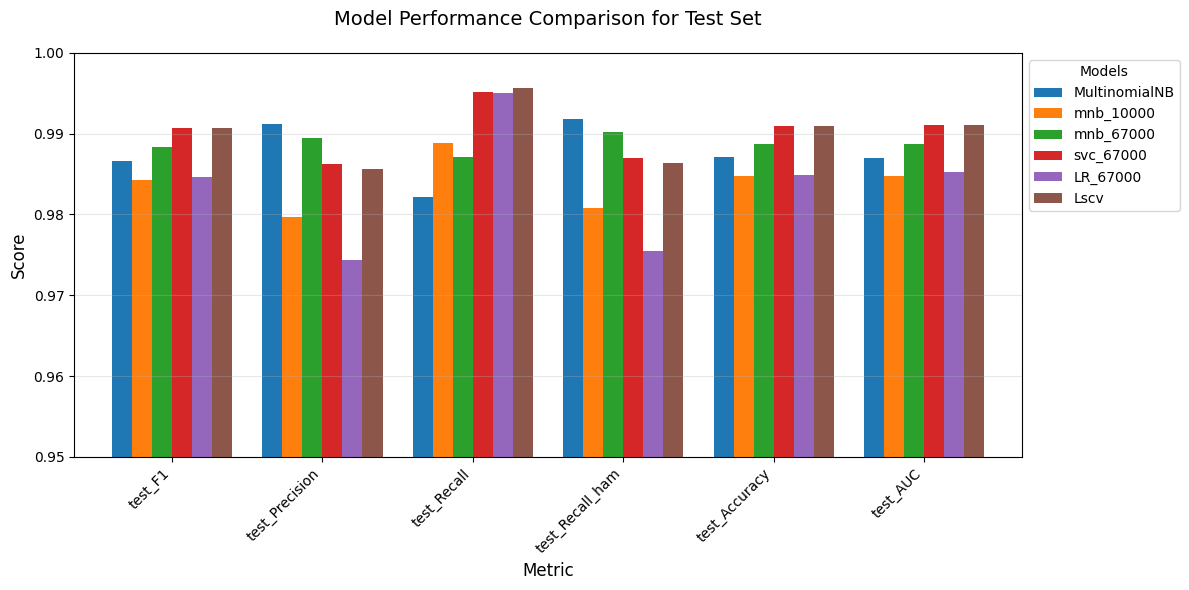

In [18]:
# Create visualization
test_scr_df = scores_svc_lr[[col for col in scores_svc_lr.columns if col.startswith('test_')]]
fig, ax = plt.subplots(figsize=(12, 6))

test_scr_df.T.plot(kind='bar',ax=ax, width=0.8)

plt.title('Model Performance Comparison for Test Set', fontsize=14, pad=20)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Models', bbox_to_anchor=(1, 1))
plt.ylim(0.95, 1.0)  # Focus on the differences
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


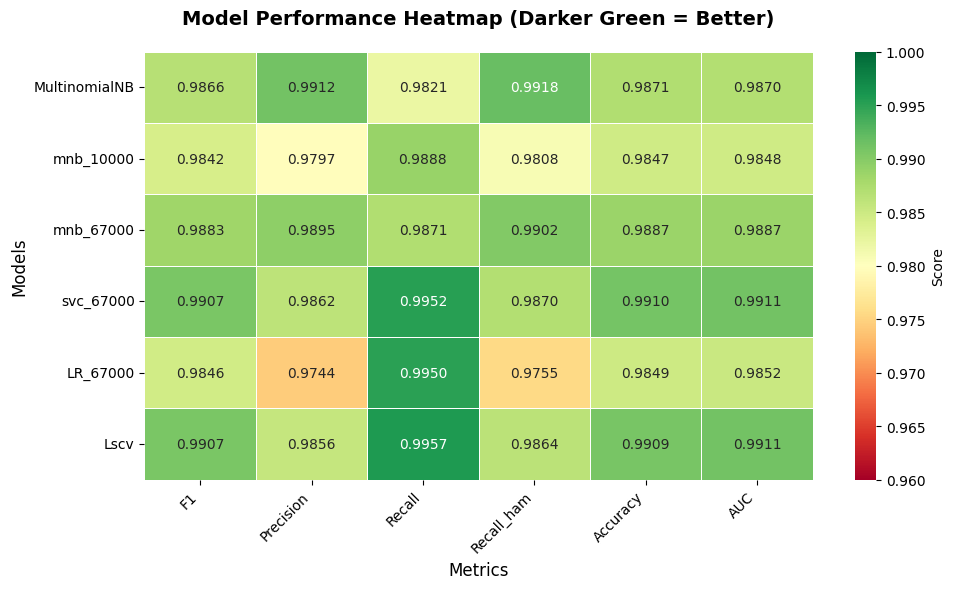

In [21]:
# Select test metrics

test_scr_df.columns = [col.replace('test_', '') for col in test_scr_df.columns]

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(test_scr_df, annot=True, fmt='.4f', cmap='RdYlGn', 
            vmin=0.96, vmax=1.0, linewidths=0.5, cbar_kws={'label': 'Score'},
            ax=ax)

plt.title('Model Performance Heatmap (Darker Green = Better)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


- Heatmap shows LinearSVC (Lscv) dominates across metrics
- LinearSVC performs better especially at minimizing legitimate emails misclassified as spam 
Next step: test the pipeline on the test set

### Save scores dataframe

In [ ]:
scores_svc_lr.to_csv(parent_dir/'data'/'scores_df.csv')

### Fit the pipeline on the data


In [ ]:
pipeline.fit(emails,y)

### Print Important features for spam and ham emails
- Print top 30 to 40 features that are important for spam detection

In [ ]:
vectorizer = pipeline.named_steps['preprocessor'].named_transformers_['tfidf']
model = pipeline.named_steps['model']

# Get feature names (words) and their coefficients (importance)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]  # LinearSVC has coef_ attribute
feature_coef = coefficients[:len(feature_names)]

print(f"Total features analyzed: {len(feature_names):,}\n")

# Create DataFrame for analysis
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': feature_coef
})

# Sort by importance
feature_importance = feature_importance.sort_values('coefficient', ascending=False)


In [ ]:
# Top spam words (highest positive coefficients)
top_spam = feature_importance.nlargest(40, 'coefficient')
print("TOP SPAM WORDS:")
print(top_spam[['feature', 'coefficient']])

# Top ham words (most negative coefficients)
top_ham = feature_importance.nsmallest(30, 'coefficient')
print("\nTOP HAM WORDS:")
print(top_ham[['feature', 'coefficient']])

### Save the pipeline

In [ ]:
import os
os.getcwd()

In [ ]:


joblib.dump(pipeline,parent_dir/"src"/"models"/"spam_trained_model.joblib")

### Now I need to test the optimal model on the test data that was held at the beginning 
- Import test set

In [22]:

X_test_org = pd.read_csv(parent_dir/'data'/'X_test.csv')
assert 'Message' in X_test_org.columns, 'No message column'
assert 'Subject' in X_test_org.columns, 'No subject column'
assert X_test_org.shape[0]>0, 'No data imported'
print("Size of test data",X_test_org.shape)

X_test_org.head()


Size of test data (6744, 4)


,Message ID,Subject,Message,Date
0,31709,mega ppharmacy you want,"hello , welcome to health suite http : / / www...",2005-02-08
1,18470,re : order confirmation - # jg - 9931,"hey , come on - buy some viagra - as low as $ ...",2004-03-11
2,18949,"buy your medicines from us , viagra , xanax an...",no doctor visit needed .\nremove .\nways . wee...,2004-05-16
3,14490,re : proposed retention bonuses for netco,"jennifer doesn ' t know it yet , but when i su...",2001-12-31
4,30651,leve a festa party zone antena 3 ao seu espaã ...,english version em 2005 tenha uma das festas p...,2004-12-02


In [23]:
y_test_org = pd.read_csv(parent_dir/'data'/'y_test.csv')
assert y_test_org.shape[0]>0, 'No data imported'
y_test_org

,Spam/Ham
0,spam
1,spam
2,spam
3,ham
4,spam
...,...
6739,ham
6740,spam
6741,ham
6742,spam


### Clean test set using prepocessing function

In [24]:
import sys
sys.path.append('../src')

import preprocessor
X_test, y_test = preprocessor.clean_data(X_test_org, y_test_org)

In [26]:
print(X_test.shape)
X_test.head()

(6536, 4)


,Message ID,Subject,Message,Date
0,31709,mega ppharmacy you want,"hello , welcome to health suite http : / / www...",2005-02-08
1,18470,re : order confirmation - # jg - 9931,"hey , come on - buy some viagra - as low as $ ...",2004-03-11
2,18949,"buy your medicines from us , viagra , xanax an...",no doctor visit needed .\nremove .\nways . wee...,2004-05-16
3,14490,re : proposed retention bonuses for netco,"jennifer doesn ' t know it yet , but when i su...",2001-12-31
4,30651,leve a festa party zone antena 3 ao seu espaã ...,english version em 2005 tenha uma das festas p...,2004-12-02


In [27]:
y_test

0       1
1       1
2       1
3       0
4       1
       ..
6739    0
6740    1
6741    0
6742    1
6743    1
Name: Label, Length: 6536, dtype: int64

#### Add new features and combine subject and message

In [28]:
X_test = preprocessor.add_new_features(X_test)
X_test.head()


,Message ID,Subject,Message,Date,day_of_week,repeat_freq
0,31709,mega ppharmacy you want,"hello , welcome to health suite http : / / www...",2005-02-08,1,1
1,18470,re : order confirmation - # jg - 9931,"hey , come on - buy some viagra - as low as $ ...",2004-03-11,3,1
2,18949,"buy your medicines from us , viagra , xanax an...",no doctor visit needed .\nremove .\nways . wee...,2004-05-16,6,1
3,14490,re : proposed retention bonuses for netco,"jennifer doesn ' t know it yet , but when i su...",2001-12-31,0,1
4,30651,leve a festa party zone antena 3 ao seu espaã ...,english version em 2005 tenha uma das festas p...,2004-12-02,3,1


### Combine subject and message

In [29]:
#combine 
X_test = preprocessor.combine_data(X_test)
X_test.head()

,Message ID,Subject,Message,Date,day_of_week,repeat_freq,combined_with_stopwords
0,31709,mega ppharmacy you want,"hello , welcome to health suite http : / / www...",2005-02-08,1,1,"mega ppharmacy you want hello , welcome to hea..."
1,18470,re : order confirmation - # jg - 9931,"hey , come on - buy some viagra - as low as $ ...",2004-03-11,3,1,"re : order confirmation - # jg - 9931 hey , co..."
2,18949,"buy your medicines from us , viagra , xanax an...",no doctor visit needed .\nremove .\nways . wee...,2004-05-16,6,1,"buy your medicines from us , viagra , xanax an..."
3,14490,re : proposed retention bonuses for netco,"jennifer doesn ' t know it yet , but when i su...",2001-12-31,0,1,re : proposed retention bonuses for netco jenn...
4,30651,leve a festa party zone antena 3 ao seu espaã ...,english version em 2005 tenha uma das festas p...,2004-12-02,3,1,leve a festa party zone antena 3 ao seu espaã ...


#### Load the pipeline and apply the pipeline to the test data

In [30]:
#load pipeline
pipeline_loaded = joblib.load(parent_dir/"src/models/spam_trained_model.joblib")

### fit trained pipeline to test data

In [31]:
preds = pipeline_loaded.predict(X_test)
preds

array([1, 1, 1, ..., 0, 1, 1], shape=(6536,))

In [32]:
#import scores_df
scores_df_2 = pd.read_csv(data_path/'scores_df.csv', index_col = 0)
#assert scores_df_2.shape == 
scores_df_2

,fit_time,score_time,test_F1,train_F1,test_Precision,train_Precision,test_Recall,train_Recall,test_Recall_ham,train_Recall_ham,test_Accuracy,train_Accuracy,test_AUC,train_AUC
MultinomialNB,0.0269,0.0179,0.9866,0.9924,0.9912,0.9937,0.9821,0.9912,0.9918,0.9941,0.9871,0.9927,0.9870,0.9926
mnb_10000,0.0191,0.0148,0.9842,0.9862,0.9797,0.9814,0.9888,0.9910,0.9808,0.9825,0.9847,0.9866,0.9848,0.9867
mnb_67000,2.9133,0.7467,0.9883,0.9919,0.9895,0.9922,0.9871,0.9915,0.9902,0.9927,0.9887,0.9921,0.9887,0.9921
svc_67000,128.2937,13.2380,0.9907,0.9987,0.9862,0.9980,0.9952,0.9994,0.9870,0.9981,0.9910,0.9987,0.9911,0.9987
LR_67000,4.5796,0.7310,0.9846,0.9907,0.9744,0.9834,0.9950,0.9981,0.9755,0.9842,0.9849,0.9909,0.9852,0.9912
Lscv,5.4281,0.6359,0.9907,0.9999,0.9856,0.9998,0.9957,0.9999,0.9864,0.9998,0.9909,0.9999,0.9911,0.9999


In [33]:
#score predictions
sys.path.append('../src')
import pred_scorer
scores_df_2 = pred_scorer.evaluate_predictions(y_test, preds,scores_df_2)
scores_df_2

{'test_F1': 0.9942, 'test_Precision': 0.9912, 'test_Recall': 0.9972, 'test_Recall_ham': 0.9911, 'test_Accuracy': 0.9942}


,fit_time,score_time,test_F1,train_F1,test_Precision,train_Precision,test_Recall,train_Recall,test_Recall_ham,train_Recall_ham,test_Accuracy,train_Accuracy,test_AUC,train_AUC
MultinomialNB,0.0269,0.0179,0.9866,0.9924,0.9912,0.9937,0.9821,0.9912,0.9918,0.9941,0.9871,0.9927,0.9870,0.9926
mnb_10000,0.0191,0.0148,0.9842,0.9862,0.9797,0.9814,0.9888,0.9910,0.9808,0.9825,0.9847,0.9866,0.9848,0.9867
mnb_67000,2.9133,0.7467,0.9883,0.9919,0.9895,0.9922,0.9871,0.9915,0.9902,0.9927,0.9887,0.9921,0.9887,0.9921
svc_67000,128.2937,13.2380,0.9907,0.9987,0.9862,0.9980,0.9952,0.9994,0.9870,0.9981,0.9910,0.9987,0.9911,0.9987
LR_67000,4.5796,0.7310,0.9846,0.9907,0.9744,0.9834,0.9950,0.9981,0.9755,0.9842,0.9849,0.9909,0.9852,0.9912
Lscv,5.4281,0.6359,0.9907,0.9999,0.9856,0.9998,0.9957,0.9999,0.9864,0.9998,0.9909,0.9999,0.9911,0.9999
test_set,NaN,NaN,0.9942,NaN,0.9912,NaN,0.9972,NaN,0.9911,NaN,0.9942,NaN,NaN,NaN


In [34]:
#combine X_test and y_test
X_test['label']=y_test
X_test['preds'] = preds
X_test.head()

,Message ID,Subject,Message,Date,day_of_week,repeat_freq,combined_with_stopwords,label,preds
0,31709,mega ppharmacy you want,"hello , welcome to health suite http : / / www...",2005-02-08,1,1,"mega ppharmacy you want hello , welcome to hea...",1,1
1,18470,re : order confirmation - # jg - 9931,"hey , come on - buy some viagra - as low as $ ...",2004-03-11,3,1,"re : order confirmation - # jg - 9931 hey , co...",1,1
2,18949,"buy your medicines from us , viagra , xanax an...",no doctor visit needed .\nremove .\nways . wee...,2004-05-16,6,1,"buy your medicines from us , viagra , xanax an...",1,1
3,14490,re : proposed retention bonuses for netco,"jennifer doesn ' t know it yet , but when i su...",2001-12-31,0,1,re : proposed retention bonuses for netco jenn...,0,0
4,30651,leve a festa party zone antena 3 ao seu espaã ...,english version em 2005 tenha uma das festas p...,2004-12-02,3,1,leve a festa party zone antena 3 ao seu espaã ...,1,1


#### Investigate mislabeled predictions

In [35]:
mislabeld = X_test[X_test['label'] != X_test['preds']]
mis_preds = mislabeld[['label','preds']]
mis_preds.value_counts()

label  preds
0      1        29
1      0         9
Name: count, dtype: int64

There are more legitimate emails labeled as spam 